In [20]:
# Car Price Prediction using Machine Learning
# This project predicts the selling price of a car based on its features

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [5]:
# Load the dataset
data = pd.read_csv("sample_data/car_data.csv")
print(data.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [28]:
# Check for missing values
data.drop(["Car_Name","Present_Price"],axis=1,inplace=True,errors="ignore")

In [29]:
# Convert categorical columns into numerical form
data = pd.get_dummies(data, drop_first=True)

In [31]:
# Separate features and target
X = data.drop("Selling_Price", axis=1)
y = data["Selling_Price"]

In [32]:
# Split the data into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [36]:
# Create Random Forest Model
model = RandomForestRegressor(n_estimators=100, max_depth=8, min_samples_leaf=5, random_state=42)


In [37]:
# Train model
model.fit(X_train, y_train)

# Predictions
predicted_prices = model.predict(X_test)

# Accuracy
accuracy = r2_score(y_test, predicted_prices)
print("Improved Model accuracy :", accuracy)

Improved Model accuracy : 0.7781721449165866


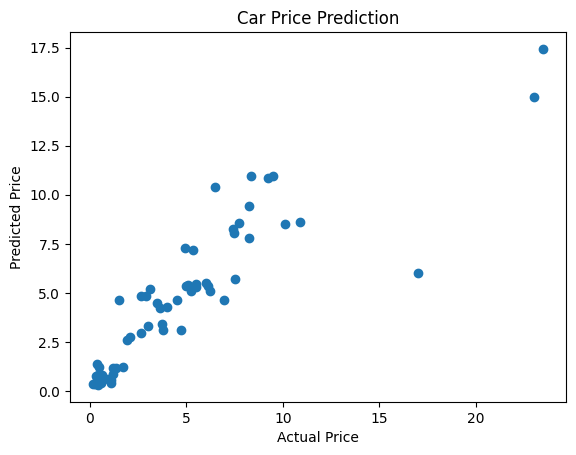

In [38]:
# Visual comparison
plt.scatter(y_test, predicted_prices)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Car Price Prediction")
plt.show()